# Practicum uitgangsweerstand
### Steven Thijs

In [131]:
import pandas as pd
from math import pi, sqrt, log
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from lmfit import models
from scipy.stats import chi2

In [132]:
%matplotlib notebook

## Metingen

Hieronder staan de gemeten waarden voor $R_b$ en $U_b$. $Ub1$ is de eerste meting en $Ub2$ de tweede. De eerste zes metingen zijn weggelaten omdat deze een veel te grote horizontale onzekerheid hadden om een fit door te plotten (zie discussie).

In [133]:
df = pd.DataFrame([
    #[1, 1.24, 1.17],
    #[2, 1.11, 1.12],
    #[3, 2.00, 2.00],
    #[5, 2.71, 2.71],
    #[7, 3.53, 3.36],
    #[10, 5.42, 5.43],
    [20, 6.60, 6.66],
    [30, 9.52, 9.56],
    [50, 12.5, 11.8],
    [70, 13.3, 13.4],
    [100, 15.2, 14.6],
    [200, 18.9, 18.2],
    [300, 19.4, 19.7],
    [500, 21.4, 20.6],
    [700, 21.8, 20.8],
    [1000, 22.4, 21.7],
    [2000, 22.9, 22.5],
    [3000, 22.9, 23.0],
    [5000, 23.1, 23.0],
    [7000, 23.0, 23.1],
    [9000, 23.2, 23.2],
], columns=['Rb', 'Ub1', 'Ub2'])
df

,Rb,Ub1,Ub2
0,20,6.60,6.66
1,30,9.52,9.56
2,50,12.50,11.80
3,70,13.30,13.40
4,100,15.20,14.60
5,200,18.90,18.20
6,300,19.40,19.70
7,500,21.40,20.60
8,700,21.80,20.80
9,1000,22.40,21.70


De onzekerheid op $R_b$ is ($\pm 1\% + 25 m \Omega$). Bij het meten van de spanning wisselde de meting in het laatste cijfer met $\pm 2$. Bij het meten van 10,0V zou de onzekerheid dus 0,2V, oftewel 2% zijn. Bij erg lage spanningen neigde de gemeten sinusgolf ook erg te 'wiebelen' op de osciloscoop en was de meting niet erg consistent, dus nemen we een vaste onzekerheid van 0,3 V. De metingen zelf liggen ook ongeveer 2% uit elkaar, dus als meetonzekerheid voor het gemiddelde nemen we $2% \pm 0.3V$.

In [134]:
df['Ub'] = (df['Ub1'] + df['Ub2'])/2
df['errUb'] = .02 * df['Ub'] + 0.3
df['errRb'] = .02 * df['Rb'] + 25e-3
df

,Rb,Ub1,Ub2,Ub,errUb,errRb
0,20,6.60,6.66,6.63,0.4326,0.425
1,30,9.52,9.56,9.54,0.4908,0.625
2,50,12.50,11.80,12.15,0.5430,1.025
3,70,13.30,13.40,13.35,0.5670,1.425
4,100,15.20,14.60,14.90,0.5980,2.025
5,200,18.90,18.20,18.55,0.6710,4.025
6,300,19.40,19.70,19.55,0.6910,6.025
7,500,21.40,20.60,21.00,0.7200,10.025
8,700,21.80,20.80,21.30,0.7260,14.025
9,1000,22.40,21.70,22.05,0.7410,20.025


## Grafiek van de metingen

<IPython.core.display.Javascript object>


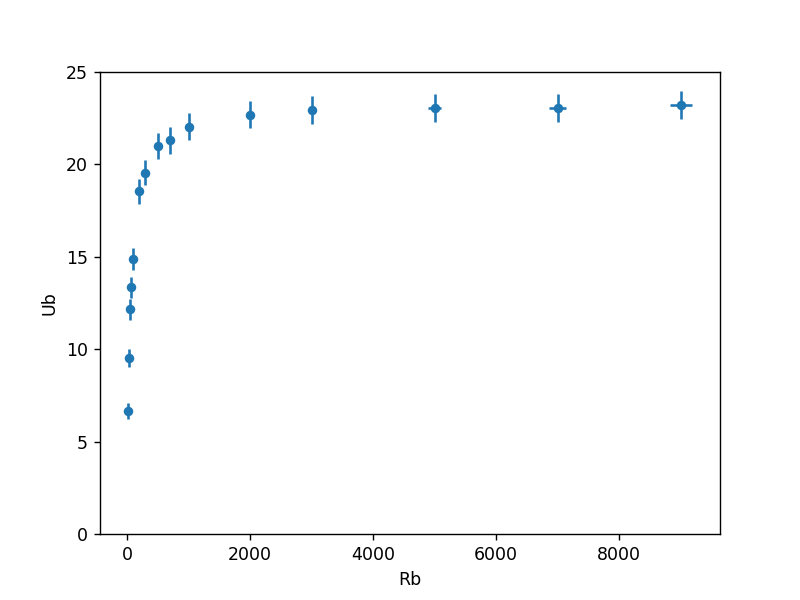

(0.0, 25.0)

In [135]:
ax = df.plot.scatter('Rb', 'Ub', xerr='errRb', yerr='errUb')
plt.ylim(0, 25)

### Fit van de metingen

Voor het fitten aan de data wordt de `Model.fit` module gebruikt. De fit is te zien in de oranje lijn.

<IPython.core.display.Javascript object>


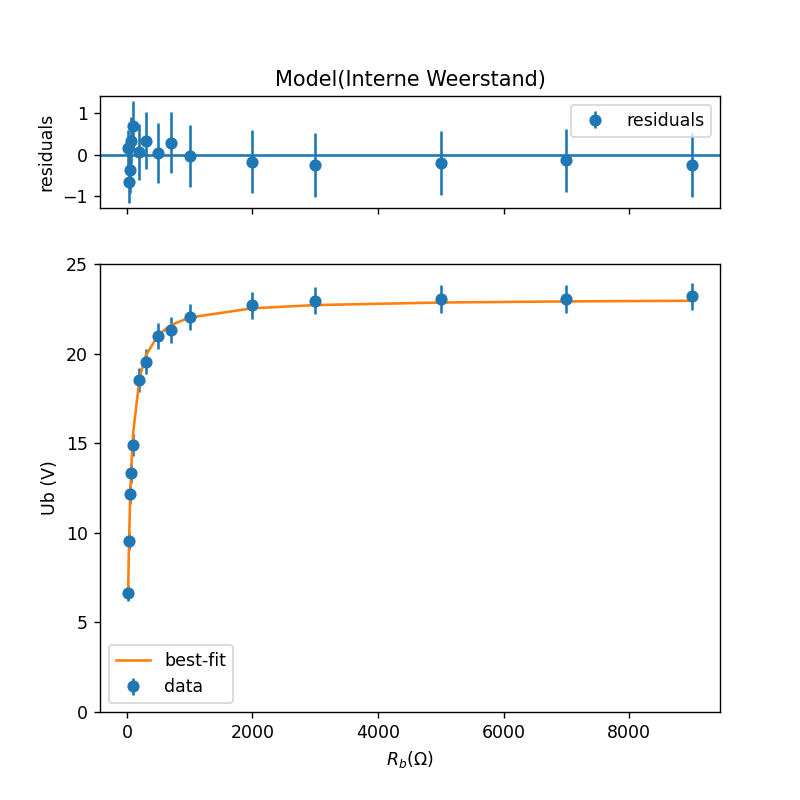

(0.0, 25.0)

In [152]:
f = lambda Rb, Ru, U0: Rb/(Ru+Rb)*U0
mod_weerstand = models.Model(f, name="Interne Weerstand")

fit = mod_weerstand.fit(df['Ub'], Rb=df['Rb'], weights=1/df['errUb'], Ru=5, U0= 20)

fit.plot(ylabel='Ub (V)', xlabel='$R_b (\Omega)$')
plt.ylim(0, 25)

Onderstaand staan alle gegevens van de fit.

In [137]:
fit

In [138]:
print(f'De gevonden p-waarde is: {1-chi2.cdf(fit.chisqr, fit.nfree): .3f}')

De gevonden p-waarde is:  0.977


## Linearisatie

Soms is het makkelijker te fitten aan een rechte lijn. Om te zien of dit een ander resultaat opleverd, kunnen we $U_b = \frac{R_b}{R_u + R_b} \cdot U_0$ omschrijven naar $\frac{1}{U_b} = \frac{R_u}{U_0}\cdot \frac{1}{R_b} + \frac{1}{U_0}$. We zien dat $R_b^{-1}$ evenredig is met $U_b^{-1}$. Onderstaand voegen we deze grootheden (Ub-1 en Rb-1) toe, samen met de geprogageerde fouten (errUb en errRb).

In [139]:
df['Ub-1'] = 1/(df['Ub'])
df['Rb-1'] = 1/(df['Rb'])
df['errUb-1'] = 1/df['Ub']**2*df['errUb']
df['errRb-1'] = 1/df['Rb']**2*df['errRb']
df

,Rb,Ub1,Ub2,Ub,errUb,errRb,Ub-1,Rb-1,errUb-1,errRb-1
0,20,6.60,6.66,6.63,0.4326,0.425,0.150830,0.050000,0.009841,0.001063
1,30,9.52,9.56,9.54,0.4908,0.625,0.104822,0.033333,0.005393,0.000694
2,50,12.50,11.80,12.15,0.5430,1.025,0.082305,0.020000,0.003678,0.000410
3,70,13.30,13.40,13.35,0.5670,1.425,0.074906,0.014286,0.003181,0.000291
4,100,15.20,14.60,14.90,0.5980,2.025,0.067114,0.010000,0.002694,0.000202
5,200,18.90,18.20,18.55,0.6710,4.025,0.053908,0.005000,0.001950,0.000101
6,300,19.40,19.70,19.55,0.6910,6.025,0.051151,0.003333,0.001808,0.000067
7,500,21.40,20.60,21.00,0.7200,10.025,0.047619,0.002000,0.001633,0.000040
8,700,21.80,20.80,21.30,0.7260,14.025,0.046948,0.001429,0.001600,0.000029
9,1000,22.40,21.70,22.05,0.7410,20.025,0.045351,0.001000,0.001524,0.000020


Als we deze nieuwe plotten krijgen we inderdaad een rechte lijn. Omdat de ingestelde weerstand een vaste fout van $25 m \Omega$ had, zijn de horizontale foutmarges voor kleine weerstanden (oftewel grote Rb-1's) erg groot. Dit is ook waarom we besloten hadden de eerste 6 metingen te negeren. 

<IPython.core.display.Javascript object>


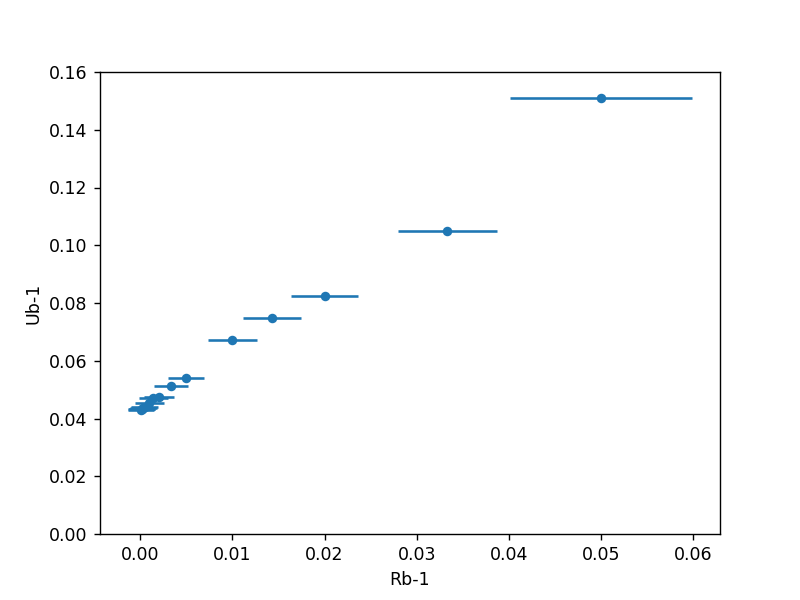

(0.0, 0.16)

In [155]:
df.plot.scatter('Rb-1', 'Ub-1', xerr='errUb-1', yerr='errRb-1')
plt.ylim(0, 0.16)

Wanneer we naar deze data fitten met `models.LinearModel` krijgen we de volgende grafiek.

<IPython.core.display.Javascript object>


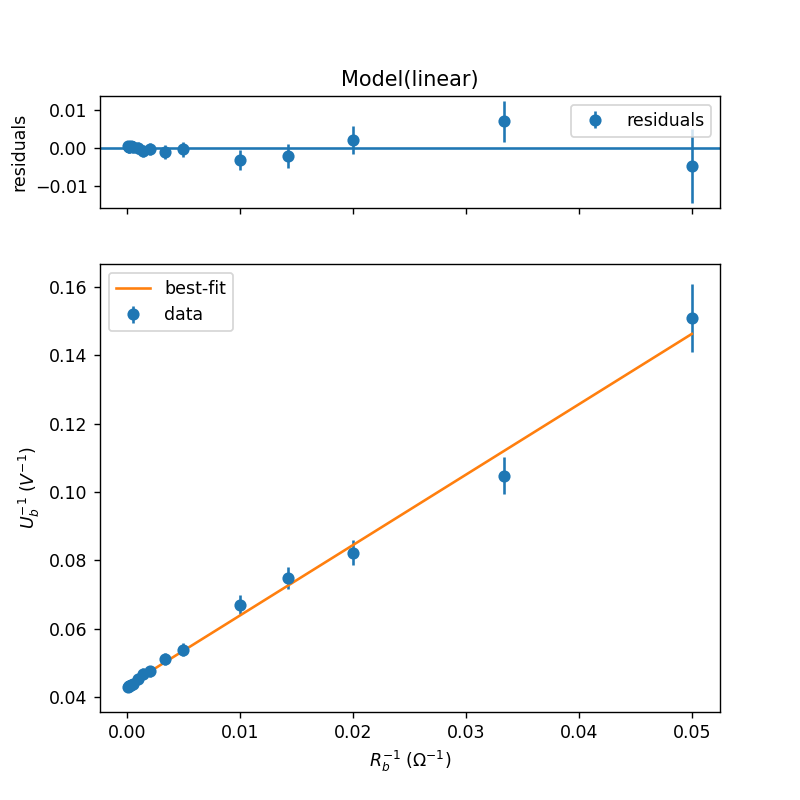

(<Figure size 640x640 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

In [156]:
mod_linear = models.LinearModel()
pars = mod_linear.make_params (slope=0, intercept = 0)
fit = mod_linear.fit(df['Ub-1'], x=df['Rb-1'], 
                     weights=1/df['errUb-1'], params=pars)
fit.plot(ylabel='$U_b^{-1} \;(V^{-1})$', xlabel='$R_b^{-1} \;(\Omega^{-1})$')

Onderstaand weer de belangrijkste informatie van deze fit.

In [157]:
fit

'a' is de helling van de lijn en is gelijk aan $\frac{R_u}{U_0}$. 'b' is de hoogte op x=0 en is gelijk aan $\frac{1}{U_0}$. Deze waarden kunnen we omrekenen en we zien dat $R_u = \frac{a}{b}$ en $U_0 = \frac{1}{b}$. De foutmarges voor $R_u$ berekend met de algemene formule voor foutenpropegatie, maar neem deze niet te serieus omdat a en b eigenlijk niet onafhankelijk zijn.

In [163]:
a= fit.params['slope'].value
da = fit.params['slope'].stderr
b= fit.params['intercept'].value
db = fit.params['intercept'].stderr
U0 = 1/b
dU0 = (1/b**2)*db
Ru = a/b 
dRu = sqrt((da/a)**2+(db/b)**2)*Ru
print(f'De gevonden waarden zijn U0= {U0:.2f} +/- {dU0:.2f} V'
      f' en Ru = {a/b:.1f} +/-{dRu: .1f} Ohm.')

De gevonden waarden zijn U0= 23.06 +/- 0.17 V en Ru = 47.4 +/- 1.4 Ohm


In [164]:
print(f'De bijbehorende p-waarde is: {1-chi2.cdf(fit.chisqr, fit.nfree)}')

De bijbehorende p-waarde is: 0.9748280813636933


## Conclusie

De eerste methode van de curve direct fitten geeft een $R_u$ van $48.0 \pm 1.5 \Omega$. Na de linearisatie krijgen we een waarde van $47.4 \pm 1.4 \Omega$. Deze waarden liggen binnen elkaars meetfouten, dus we kunnen concluderen dat de daadwerkelijke uitgangsweerstand rond de $47.7 \pm 1.5 \Omega$ is. (De exacte foutmarge is lastig af te leiden aangezien deze twee waarden van $R_u$ niet onafhankelijk zijn).